<h3>Pattern Recognition PR 555</h3>
### Part 1 and Part 2 of the Problem Set 2, rest other answers are in the report###
#### Coding done in Python 2.7####
<h3>Installation Setup</h3>
In the anaconda command prompt type:<br/>
<strong>conda install -c anaconda graphviz</strong><br/>
add the path variable to environment file,<br/> C:\Users\jayan\Miniconda3\pkgs\graphviz-2.38.0-4\Library\bin\<br/> C:\Users\jayan\Miniconda3\pkgs\graphviz-2.38.0-4\Library\bin\graphviz\<br/>
path may vary depending upon where the graphviz is installed
Close and reopen the anaconda  command prompt (as python kernel restart is 


<span style="color:red">Jayant Solanki<span><br/>
    <span style="color:red">50246821<span><br/>
        <span style="color:red">jayantso@buffalo.edu<span>

In [90]:
# please install below dependency using pip install "packagename"
# don't pip install graphviz
#conda install -c anaconda graphviz, and add the path variable to environment file, C:\\Users\\jayan\\Miniconda3\\pkgs\\graphviz-2.38.0-4\\Library\\bin\\ ad C:\\Users\\jayan\\Miniconda3\\pkgs\\graphviz-2.38.0-4\\Library\\bin\\graphviz\\
import bif_parser
import prettytable
import pydot
from IPython.core.display import Image
from bayesian.bbn import *
name = 'asia'
module_name = bif_parser.parse(name)
module = __import__(module_name)
bg = module.create_bbn()
# bg
# os.environ["PATH"]

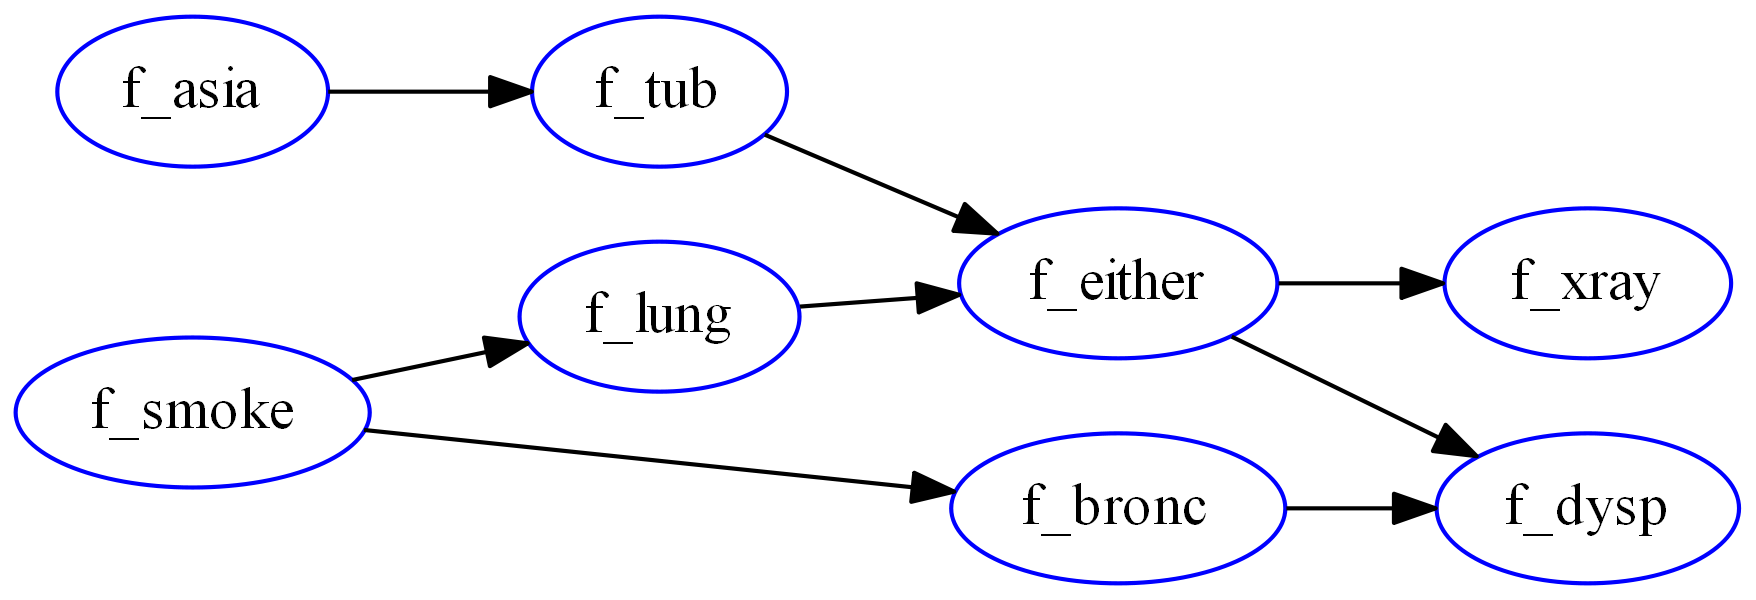

In [91]:
def show_graphgiz_image(graphviz_data):#ode for drawing the model
    (graph,) = pydot.graph_from_dot_data(graphviz_data)
    graph.write_png('temp.png')
    return 'temp.png'
sf=bg.get_graphviz_source()
Image(filename=show_graphgiz_image(sf))

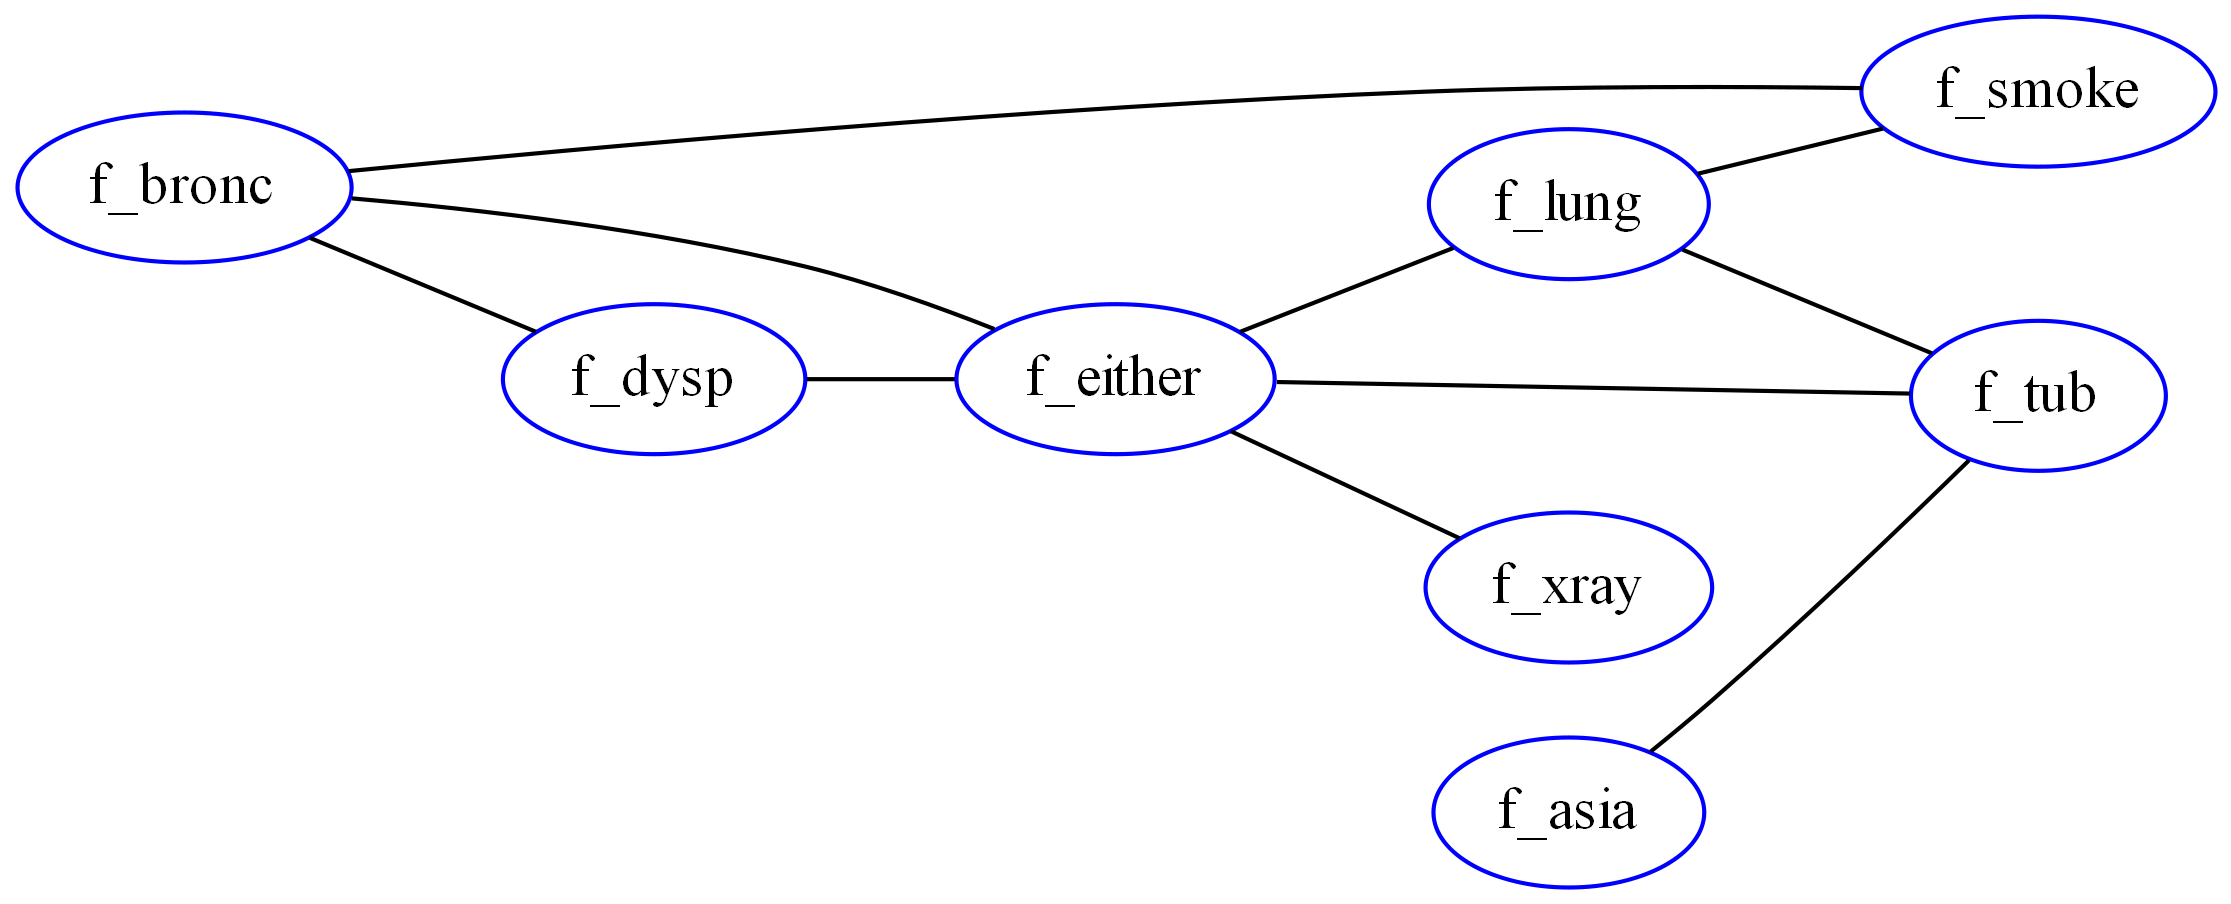

In [52]:
# moralization
gu=make_undirected_copy(bg)
m1=make_moralized_copy(gu,bg)
s2=m1.get_graphviz_source()
Image(filename=show_graphgiz_image(s2))

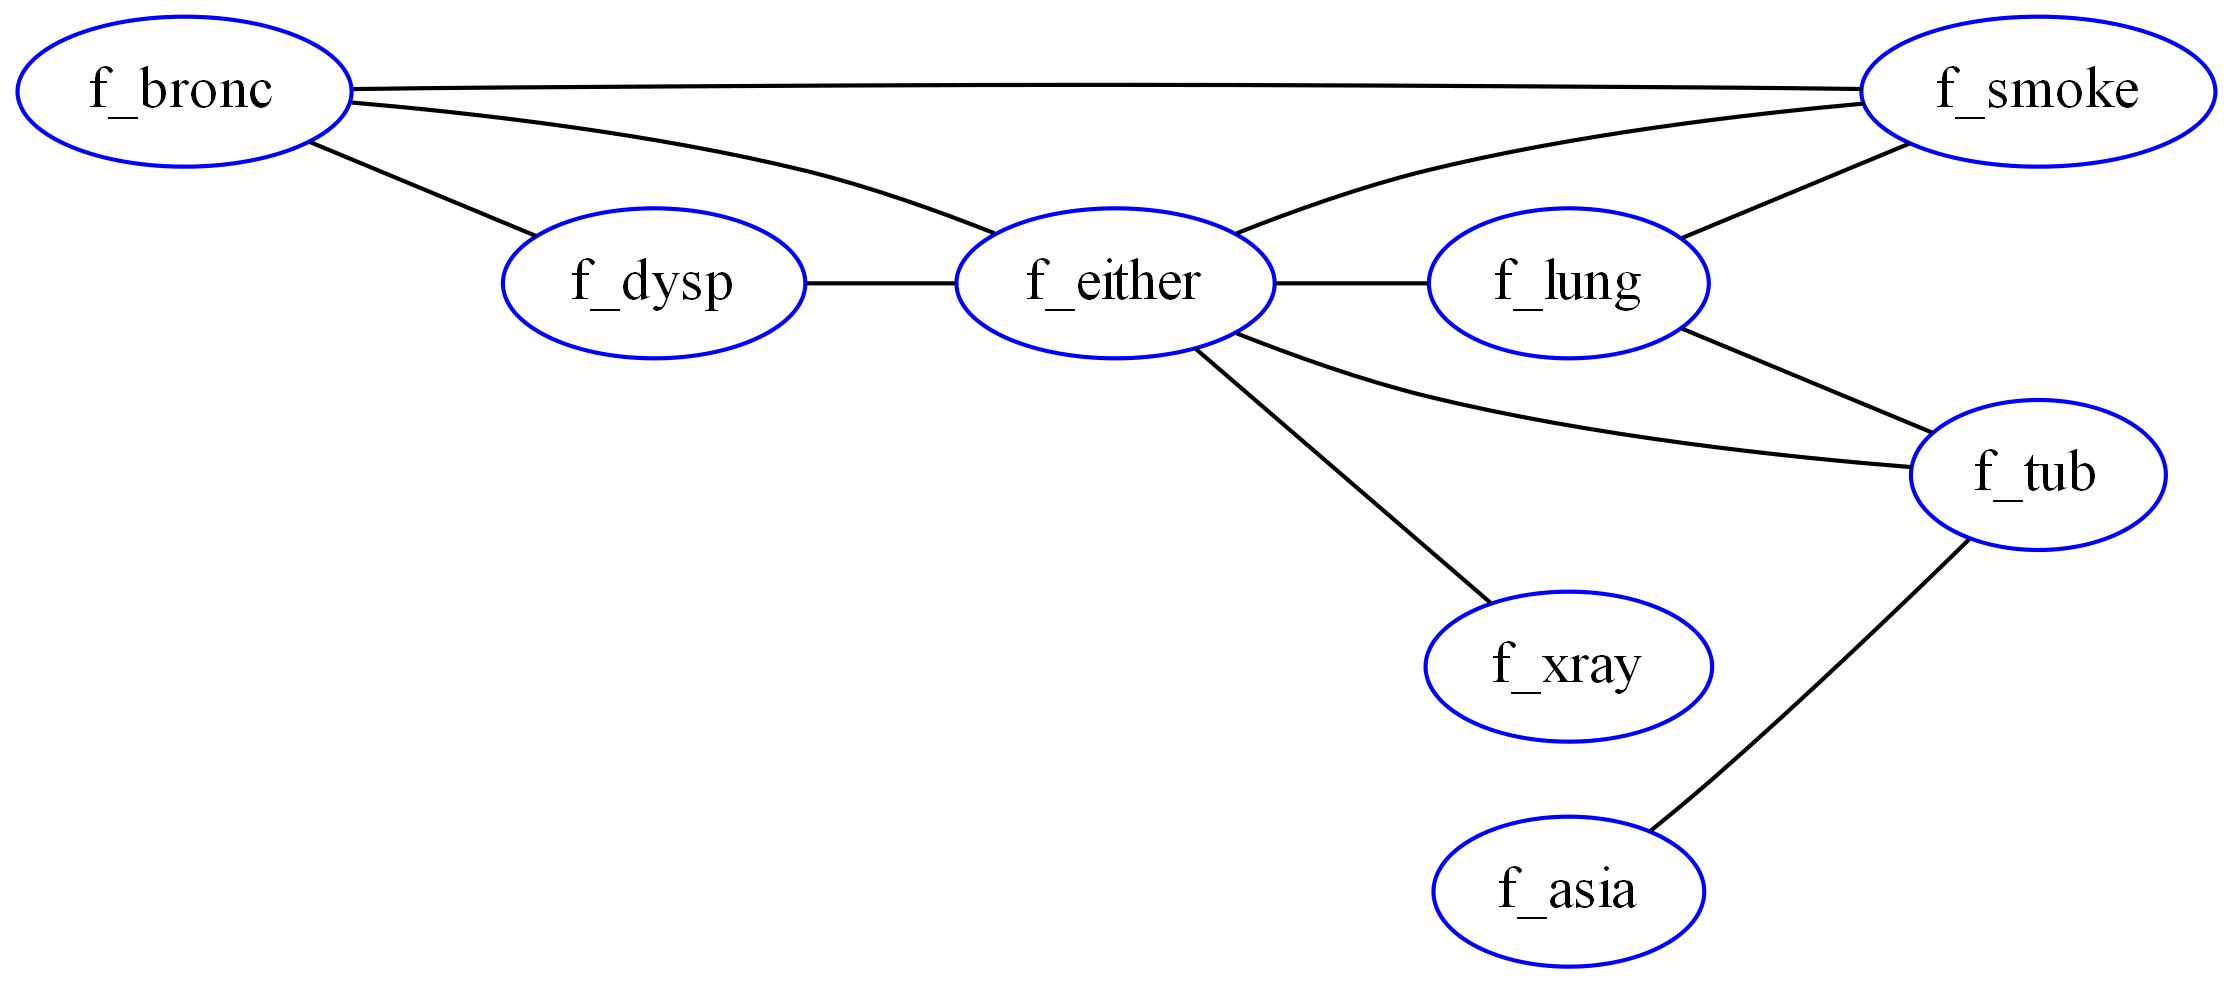

In [51]:
#triangulation
cliques, elimination_ordering = triangulate(m1, priority_func)
s2=m1.get_graphviz_source()
Image(filename=show_graphgiz_image(s2))

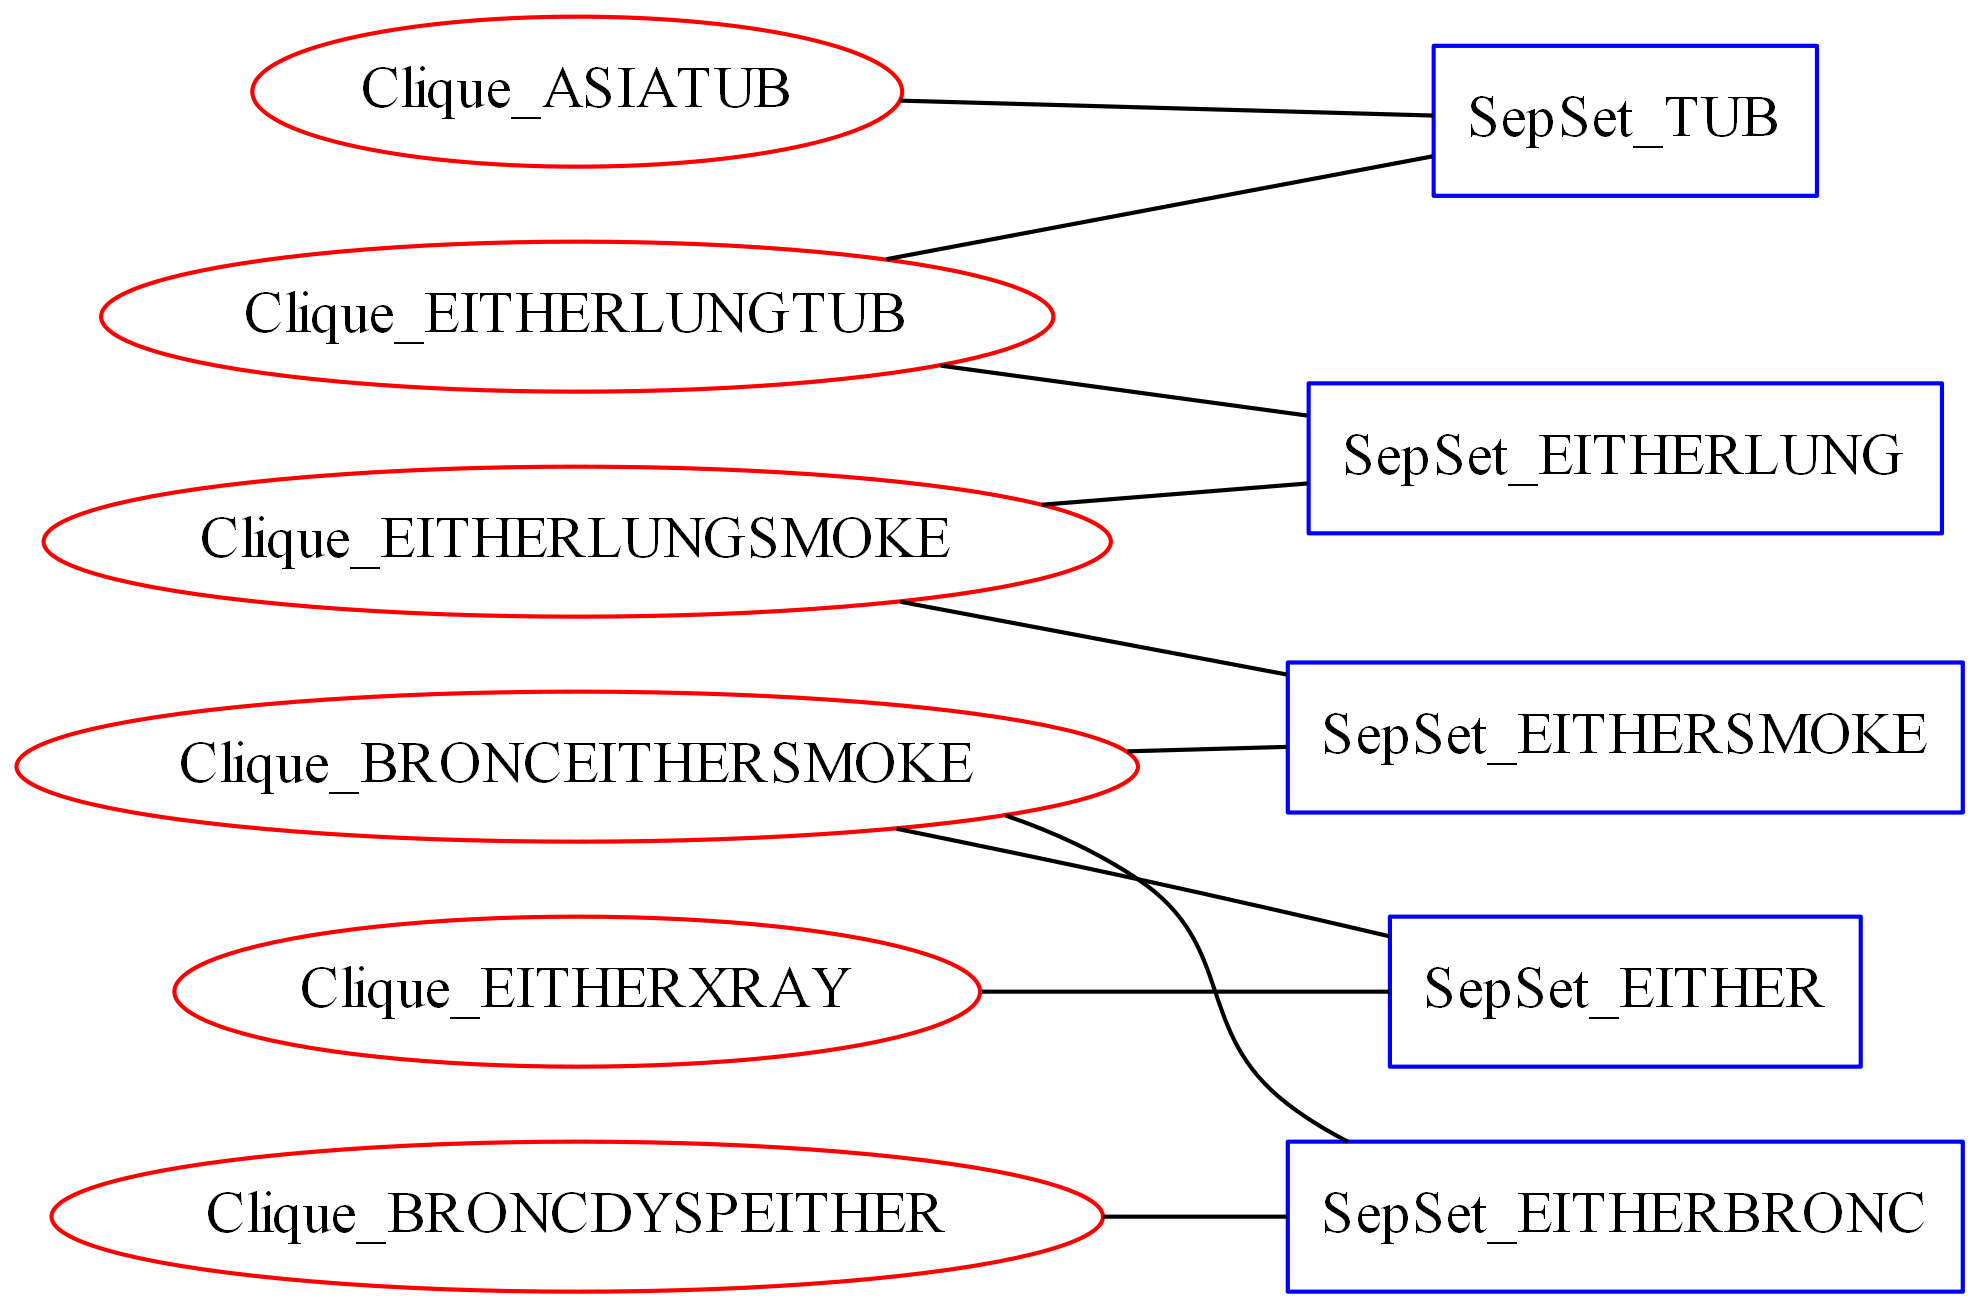

In [50]:
# join tree
jt=bg.build_join_tree()
sf=jt.get_graphviz_source()
Image(filename=show_graphgiz_image(sf))
# We can see from the variable names that the sepsets contain the intersection points
# of variables from the cliques that they connect with. For example, the variables in
# the cliques {Bronc, Either, Smoke} and {Bronc,Dysp, Either} are the variables in the
# {Bronc, Either} sepset.

In [92]:
assignments = jt.assign_clusters(bg)#intialising q-functions
jt.initialize_potentials(assignments,bg)

In [94]:
jt.propagate()#passing the beliefs

In [96]:
#finding the marginals
# bronc_clust=[i for i in jt.clique_nodes for v in i.variable_names if v
# =='bronc']
# bronc_clust[0].potential_tt

In [97]:
#finding the marginals
pot=bronc_clust[0].potential_tt
#a function to return the sum for a specific assignment, such as 'bronc,yes'
sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for
i in k if i == tup])
#get the sum for bronc=yes and bronc=no
yes,no=[sum_assignments(pot,('bronc',i)) for i in ['yes','no']]
print 'bronc: yes ', yes/float(yes+no)," no ", no/float(yes+no)

bronc: yes  0.45  no  0.55


In [98]:
asia_clust=[i for i in jt.clique_nodes for v in i.variable_names if v
=='asia']
asia_clust[0].potential_tt
pot=asia_clust[0].potential_tt
sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for
i in k if i == tup])
#get the sum for asia=yes and asia=no
yes,no=[sum_assignments(pot,('asia',i)) for i in ['yes','no']]
print 'asia: yes ', yes/float(yes+no)," no ", no/float(yes+no)

asia: yes  0.01  no  0.99


In [77]:
smoke_clust=[i for i in jt.clique_nodes for v in i.variable_names if v
=='smoke']
smoke_clust[0].potential_tt
pot=smoke_clust[0].potential_tt
sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for
i in k if i == tup])
#get the sum for smoke=yes and smoke=no
yes,no=[sum_assignments(pot,('smoke',i)) for i in ['yes','no']]
print 'smoke: yes ', yes/float(yes+no)," no ", no/float(yes+no)

smoke: yes  0.5  no  0.5


In [78]:
dysp_clust=[i for i in jt.clique_nodes for v in i.variable_names if v
=='dysp']
dysp_clust[0].potential_tt
pot=dysp_clust[0].potential_tt
sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for
i in k if i == tup])
#get the sum for dysp=yes and dysp=no
yes,no=[sum_assignments(pot,('dysp',i)) for i in ['yes','no']]
print 'dysp: yes ', yes/float(yes+no)," no ", no/float(yes+no)

dysp: yes  0.4359706  no  0.5640294


In [80]:
lung_clust=[i for i in jt.clique_nodes for v in i.variable_names if v
=='lung']
lung_clust[0].potential_tt
pot=lung_clust[0].potential_tt
sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for
i in k if i == tup])
#get the sum for lung=yes and lung=no
yes,no=[sum_assignments(pot,('lung',i)) for i in ['yes','no']]
print 'lung: yes ', yes/float(yes+no)," no ", no/float(yes+no)

lung: yes  0.055  no  0.945


In [81]:
either_clust=[i for i in jt.clique_nodes for v in i.variable_names if v
=='either']
either_clust[0].potential_tt
pot=either_clust[0].potential_tt
sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for
i in k if i == tup])
#get the sum for either=yes and either=no
yes,no=[sum_assignments(pot,('either',i)) for i in ['yes','no']]
print 'either: yes ', yes/float(yes+no)," no ", no/float(yes+no)

either: yes  0.064828  no  0.935172


In [82]:
xray_clust=[i for i in jt.clique_nodes for v in i.variable_names if v
=='xray']
xray_clust[0].potential_tt
pot=xray_clust[0].potential_tt
sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for
i in k if i == tup])
#get the sum for xray=yes and xray=no
yes,no=[sum_assignments(pot,('xray',i)) for i in ['yes','no']]
print 'xray: yes ', yes/float(yes+no)," no ", no/float(yes+no)

xray: yes  0.11029004  no  0.88970996


In [84]:
tub_clust=[i for i in jt.clique_nodes for v in i.variable_names if v
=='tub']
tub_clust[0].potential_tt
pot=tub_clust[0].potential_tt
sum_assignments=lambda imap,tup:sum([v for k,v in imap.iteritems() for
i in k if i == tup])
#get the sum for tub=yes and tub=no
yes,no=[sum_assignments(pot,('tub',i)) for i in ['yes','no']]
print 'tub: yes ', yes/float(yes+no)," no ", no/float(yes+no)

 tub: yes  0.0104  no  0.9896


<h3 align="center"> End of Line</h3>